# SAS Viya R API

[SWAT Functionality](https://developer.sas.com/apis/swat/python/1.0.0/api.html)

[CAS Actions Documentation](https://go.documentation.sas.com/doc/en/pgmsascdc/v_033/allprodsactions/actionSetsByName.htm)

# Data

| Name      | Model Role | Measurement Level | Description                                                            |
|:----------|:-----------|:------------------|:-----------------------------------------------------------------------|
| BAD       | Target     | Binary            | 1 = applicant defaulted on loan or delinquent, 0 = applicant paid loan |
| CLAGE     | Input      | Interval          | Age of oldest credit line in months                                    |
| CLNO      | Input      | Interval          | Number of credit lines                                                 |
| DEBTINC   | Input      | Interval          | Debt-to-income ratio                                                   |
| DELINQ    | Input      | Interval          | Number of delinquent credit lines                                      |
| DEROG     | Input      | Interval          | Number of derogatory reports                                           |
| JOB       | Input      | Nominal           | Occupational categories                                                |
| LOAN      | Input      | Interval          | Amount of loan request                                                 |
| MORTDUE   | Input      | Interval          | Amount due on existing mortgage                                        |
| NINQ      | Input      | Interval          | Number of recent credit inquiries                                      |
| REASON    | Input      | Binary            | DebtCon = debt consolidation, HomeImp = home improvement               |
| VALUE     | Input      | Interval          | Value of current property                                              |
| YOJ       | Input      | Interval          | Years at present job                                                   |

# Load Packages

In [1]:
library(swat)
library(repr)
options(repr.plot.width=20, repr.plot.height=20)

SWAT 1.8.2



# Get Key Variables

In [2]:
df = read.csv(paste0(dirname(getwd()),"/password_r.txt"), header=TRUE, stringsAsFactors=FALSE)

# Connect to CAS

In [3]:
conn = CAS(hostname=df$hostname, port=df$port, username=df$username, password=df$password, protocol=df$protocol)

NOTE: Connecting to CAS and generating CAS action functions for loaded
      action sets...

NOTE: To generate the functions with signatures (for tab completion), set 
      options(cas.gen.function.sig=TRUE).



# Get Data

In [4]:
df_cas = defCasTable(conn, tablename = "hmeq_part", caslib = "Public")

# View Data

In [5]:
head(df_cas)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,PARTIND
,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>
1,1,13000,60000,86400,DebtCon,Other,12,0,2,149.16667,0,28,NaN,0
2,1,13000,111000,137813,,Mgr,6,2,2,138.33333,3,65,NaN,1
3,1,13000,152029,173750,HomeImp,ProfExe,20,0,0,19.33333,7,5,NaN,0
4,0,13000,26863,44218,HomeImp,Other,10,0,0,92.99959,2,11,29.11294,1
5,0,13000,110094,145807,DebtCon,ProfExe,2,0,0,285.27593,0,45,35.04547,0
6,0,13000,66014,85528,DebtCon,Office,4,2,3,185.64499,2,30,39.41872,0


In [6]:
colMeans(df_cas[c("BAD","LOAN","MORTDUE")])

BAD         LOAN      MORTDUE 
1.994966e-01 1.860797e+04 7.376082e+04

In [7]:
summary(df_cas)

      BAD              LOAN          MORTDUE           VALUE       
 Min.   :0.0000   Min.   : 1100   Min.   :  2063   Min.   :  8000  
 1st Qu.:0.0000   1st Qu.:11100   1st Qu.: 46268   1st Qu.: 66069  
 Median :0.0000   Median :16300   Median : 65019   Median : 89236  
 Mean   :0.1995   Mean   :18608   Mean   : 73761   Mean   :101776  
 3rd Qu.:0.0000   3rd Qu.:23300   3rd Qu.: 91491   3rd Qu.:119832  
 Max.   :1.0000   Max.   :89900   Max.   :399550   Max.   :855909  
                                  NA's   :   518   NA's   :   112  
     REASON          JOB            YOJ              DEROG         
 DebtCon:3928   Mgr    : 767   Min.   :  0.000   Min.   :  0.0000  
 HomeImp:1780   Office : 948   1st Qu.:  3.000   1st Qu.:  0.0000  
 NA's   : 252   Other  :2388   Median :  7.000   Median :  0.0000  
                ProfExe:1276   Mean   :  8.922   Mean   :  0.2546  
                Sales  : 109   3rd Qu.: 13.000   3rd Qu.:  0.0000  
                Self   : 193   Max.   : 41.000  

In [8]:
loadActionSet(conn, 'simple')

NOTE: Added action set 'simple'.

NOTE: Information for action set 'simple':

NOTE:    simple

NOTE:       mdSummary - Calculates multidimensional summaries of numeric variables

NOTE:       numRows - Shows the number of rows in a Cloud Analytic Services table

NOTE:       summary - Generates descriptive statistics of numeric variables such as the sample mean, sample variance, sample size, sum of squares, and so on

NOTE:       correlation - Computes Pearson product-moment correlations.

NOTE:       regression - Performs a linear regression up to 3rd-order polynomials

NOTE:       crossTab - Performs one-way or two-way tabulations

NOTE:       distinct - Computes the distinct number of values of the variables in the variable list

NOTE:       topK - Returns the top-K and bottom-K distinct values of each variable included in the variable list based on a user-specified ranking order

NOTE:       groupBy - Builds BY groups in terms of the variable value combinations given the variables in

In [9]:
cas.simple.freq(conn,
    table = list(name = "hmeq_part", caslib = "Public"),
    inputs = c("BAD","JOB","REASON")
)

,Column,NumVar,CharVar,FmtVar,Level,Frequency
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
1,BAD,0,,0,1,4771
2,BAD,1,,1,2,1189
3,JOB,NaN,,,1,279
4,JOB,NaN,Mgr,Mgr,2,767
5,JOB,NaN,Office,Office,3,948
6,JOB,NaN,Other,Other,4,2388
7,JOB,NaN,ProfExe,ProfExe,5,1276
8,JOB,NaN,Sales,Sales,6,109
9,JOB,NaN,Self,Self,7,193


In [10]:
loadActionSet(conn, 'sampling')

NOTE: Added action set 'sampling'.

NOTE: Information for action set 'sampling':

NOTE:    sampling

NOTE:       srs -  Samples a proportion of data from the input table or partitions the data into no more than three portions

NOTE:       stratified - Samples a proportion of data or partitions the data into no more than three portions within each stratum

NOTE:       oversample - Samples a user-specified proportion of data from the event level and adjusts the ratio between rare events and non-rare events to a user-specified ratio

NOTE:       kfold - K-fold partitioning.



In [11]:
cas.sampling.srs(conn,
    table   = list(name = "hmeq_part", caslib = "Public"),
    samppct = 50,
    seed = 12345,
    partind = FALSE,
    output  = list(casOut = list(name = 'mysam', replace = T), copyVars = 'ALL')
)

mysam = defCasTable(conn, table='mysam')
df = to.casDataFrame(mysam)

NOTE: Simple Random Sampling is in effect.

NOTE: Using SEED=12345 for sampling.



$OutputCasTables
           casLib  Name Label Rows Columns
1 CASUSER(jobake) mysam       2980      14

$SRSFreq
  NObs NSamp
1 5960  2980

In [12]:
options(repr.plot.width=20, repr.plot.height=20)

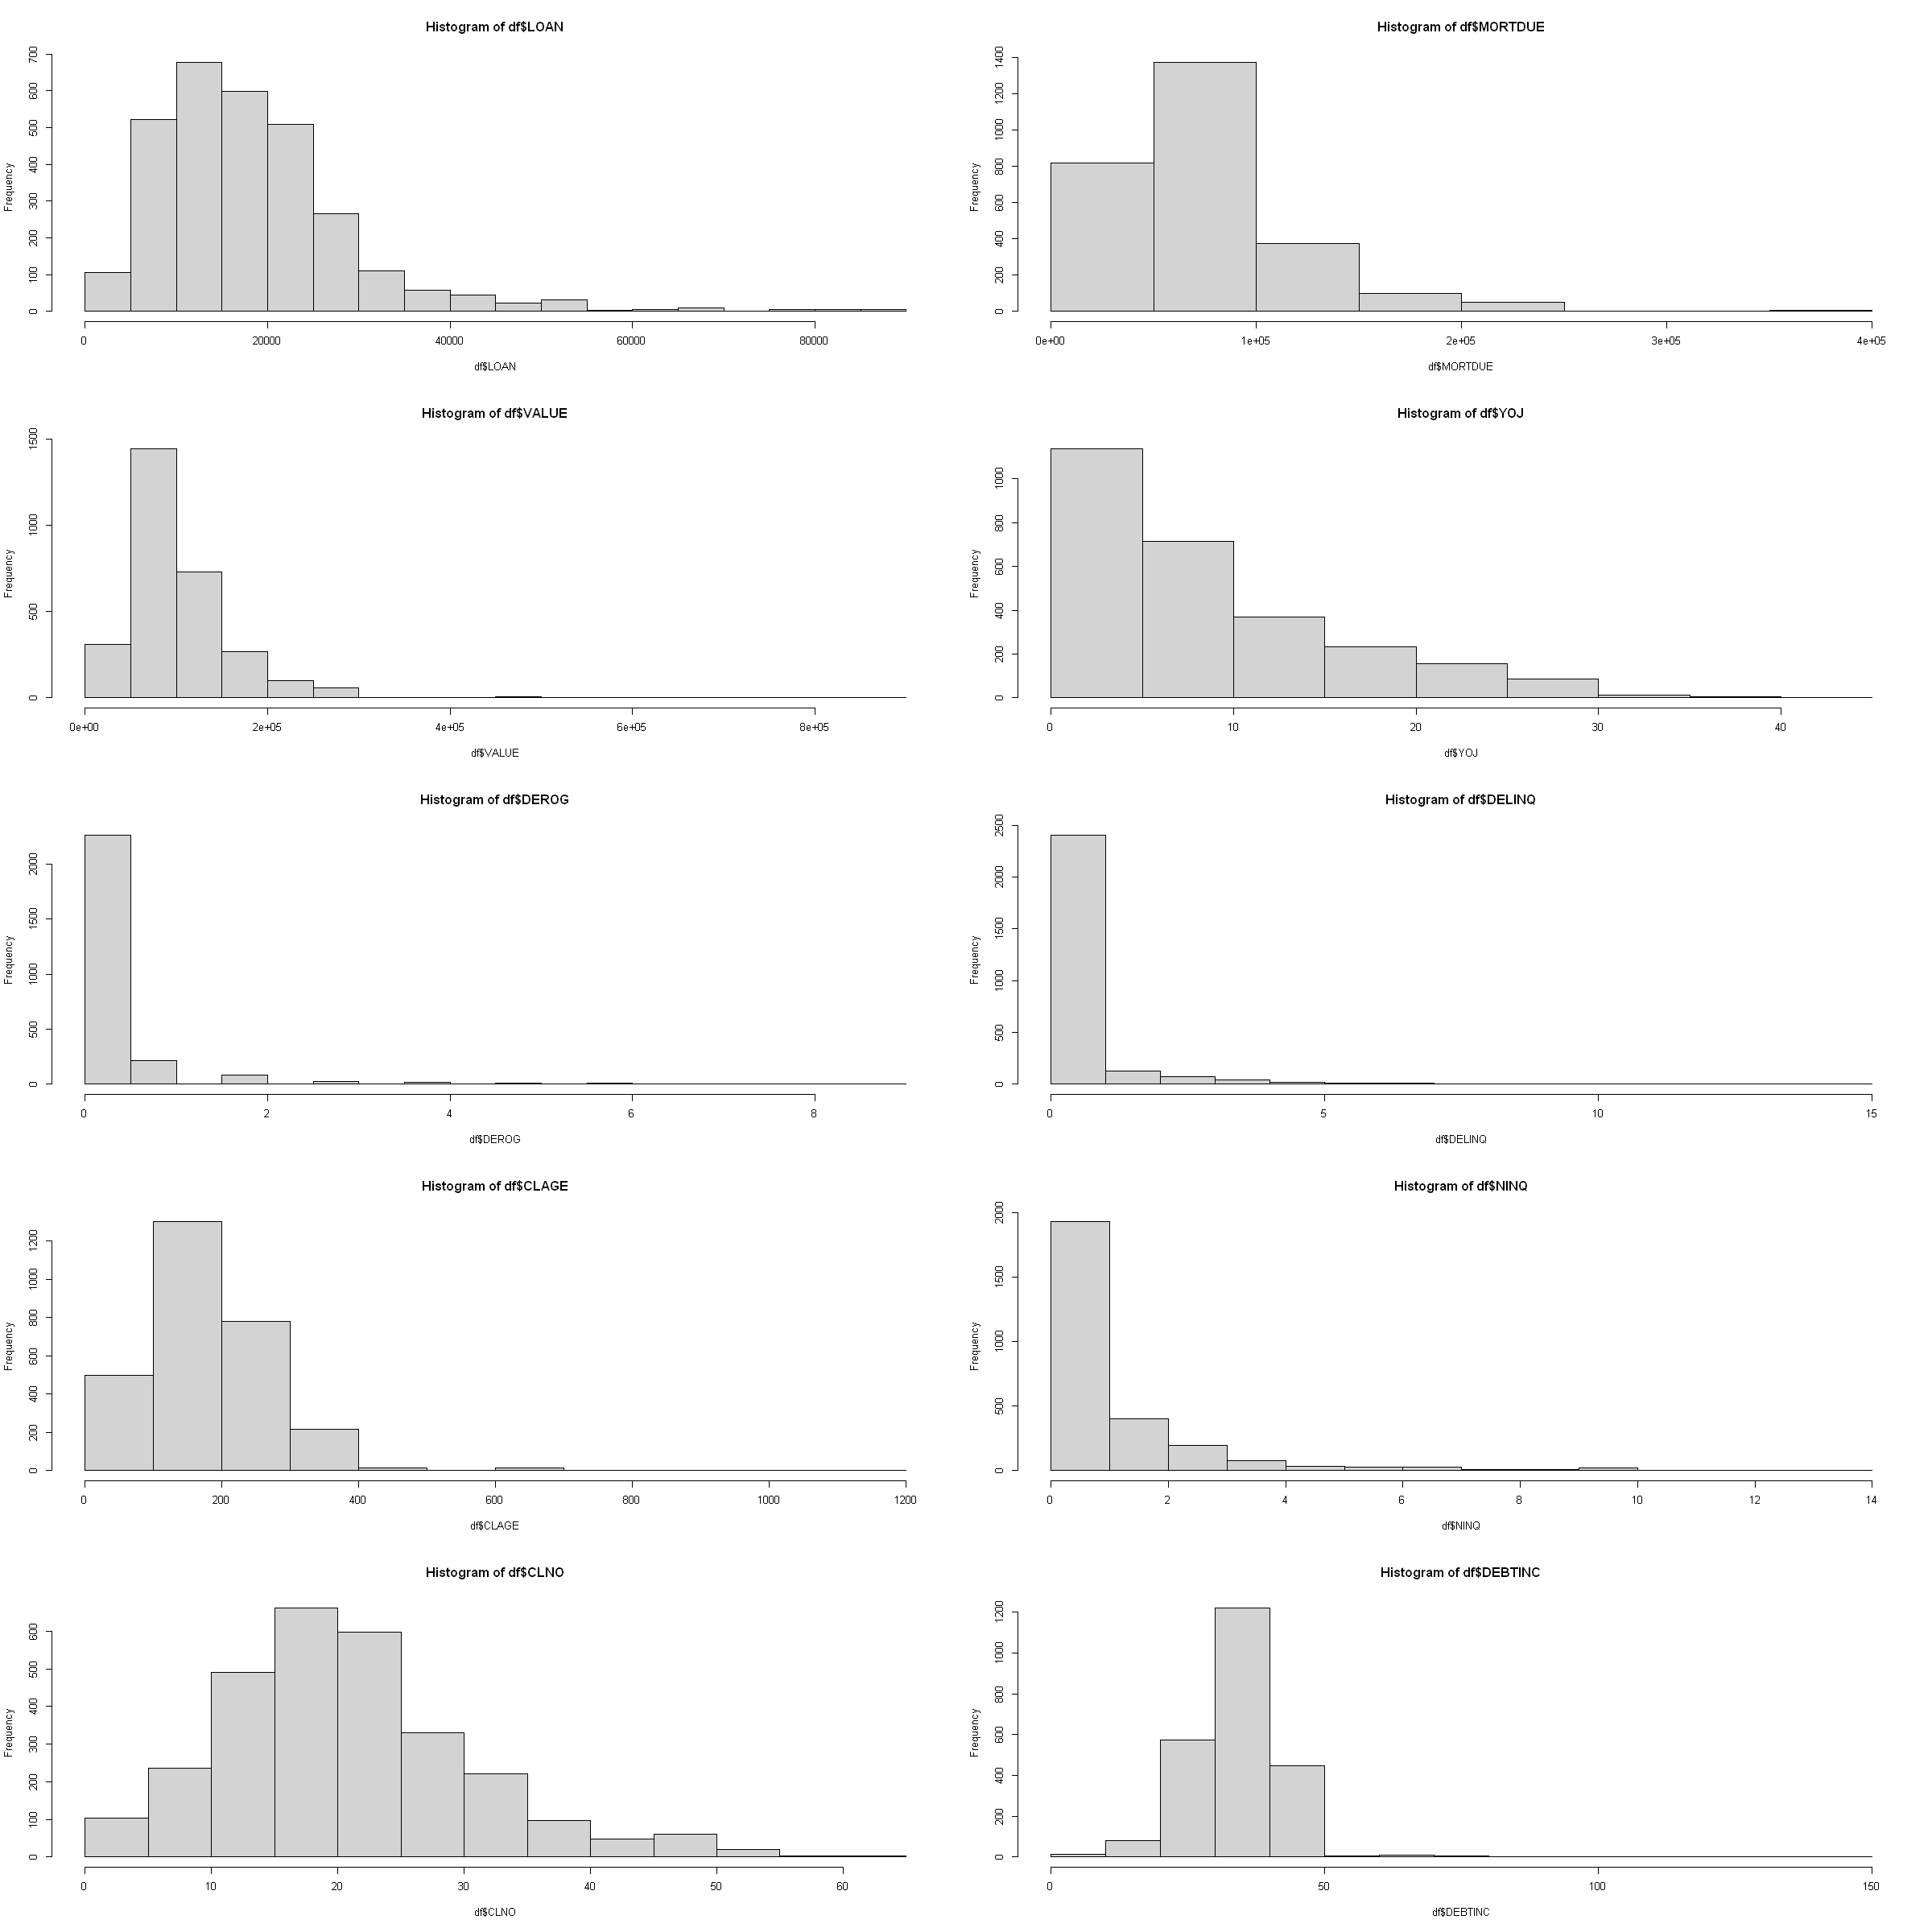

In [13]:
hist_vars = c("LOAN","MORTDUE","VALUE","YOJ","DEROG","DELINQ","CLAGE","NINQ","CLNO","DEBTINC")
par(mfrow = c(5, 2))

for(i in 1:length(hist_vars)){
    eval(parse(text=paste0("hist(df$",hist_vars[i],")")))
}
par(mfrow = c(1, 1))

In [14]:
parts = cas.simple.freq(conn,
    table = list(name = "hmeq_part", caslib = "Public"),
    inputs = "PARTIND"
)$Frequency

parts["Percent"] = parts$Frequency / nrow(df_cas)
parts

,Column,NumVar,FmtVar,Level,Frequency,Percent
,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>
1,PARTIND,0,0,1,1788,0.3
2,PARTIND,1,1,2,4172,0.7


# Impute Missing Values

In [15]:
cas.simple.distinct(df_cas)$Distinct[,c('Column', 'NMiss')]

,Column,NMiss
,<chr>,<int>
1,BAD,0
2,LOAN,0
3,MORTDUE,518
4,VALUE,112
5,REASON,252
6,JOB,279
7,YOJ,515
8,DEROG,708
9,DELINQ,580


In [16]:
impute_info = cas.dataPreprocess.impute(conn,
    table = list(name = "hmeq_part", caslib = "Public", where = 'partind = 1'),
    methodContinuous = 'MEDIAN',
    methodNominal    = 'MODE',
    inputs           = colnames(df_cas)[c(-1,-ncol(df_cas))],
    copyAllVars      = TRUE,
    casOut           = list(name = "train", replace = TRUE),
    code = list(casOut = list(name = "score_code_impute", replace = TRUE))
)

impute_info

,Variable,ImputeTech,ResultVar,N,NMiss,ImputedValueContinuous,ImputedValueNominal
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
1,LOAN,Median,IMP_LOAN,4172,0,16400.00000,
2,MORTDUE,Median,IMP_MORTDUE,3802,370,65608.50000,
3,VALUE,Median,IMP_VALUE,4087,85,89453.00000,
4,REASON,Mode,IMP_REASON,3985,187,NaN,DebtCon
5,JOB,Mode,IMP_JOB,3969,203,NaN,Other
6,YOJ,Median,IMP_YOJ,3797,375,7.00000,
7,DEROG,Median,IMP_DEROG,3668,504,0.00000,
8,DELINQ,Median,IMP_DELINQ,3758,414,0.00000,
9,CLAGE,Median,IMP_CLAGE,3960,212,171.95835,


In [17]:
int_vals = impute_info$ImputeInfo$ImputedValueContinuous[!is.na(impute_info$ImputeInfo$ImputedValueContinuous)]
nom_vals = impute_info$ImputeInfo$ImputedValueNominal[impute_info$ImputeInfo$ImputedValueNominal!=""]

cas.dataPreprocess.impute(conn,
    table = list(name = "hmeq_part", caslib = "Public", where = 'partind = 0'),
    inputs           = colnames(df_cas)[c(-1,-ncol(df_cas))],
    methodContinuous = 'VALUE',
    methodNominal    = 'VALUE',
    valuesInterval   = int_vals,
    valuesNominal    = nom_vals,
    copyAllVars      = TRUE,
    casOut           = list(name = "valid", replace = TRUE)
)

,Variable,ImputeTech,ResultVar,N,NMiss,ImputedValueContinuous,ImputedValueNominal
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
1,LOAN,Value,IMP_LOAN,1788,0,16400.0000,
2,MORTDUE,Value,IMP_MORTDUE,1640,148,65608.5000,
3,VALUE,Value,IMP_VALUE,1761,27,89453.0000,
4,REASON,Value,IMP_REASON,1723,65,NaN,DebtCon
5,JOB,Value,IMP_JOB,1712,76,NaN,Other
6,YOJ,Value,IMP_YOJ,1648,140,7.0000,
7,DEROG,Value,IMP_DEROG,1584,204,0.0000,
8,DELINQ,Value,IMP_DELINQ,1622,166,0.0000,
9,CLAGE,Value,IMP_CLAGE,1692,96,171.9584,


# Get Variables

In [18]:
colinfo = cas.table.columnInfo(conn, table=list(name = "train"))$ColumnInfo 
colinfo

target = colinfo$Column[1] 

inputs = colinfo$Column[-1] 
nominals = c(target, subset(colinfo, Type == 'varchar')$Column) 

inputs = grep('IMP_', inputs, value = T) 
nominals = c(target, grep('IMP_', nominals, value = T)) 

target 
inputs 
nominals

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<int>
1,BAD,,1,double,8,12,,0,0
2,LOAN,,2,double,8,12,,0,0
3,MORTDUE,,3,double,8,12,,0,0
4,VALUE,,4,double,8,12,,0,0
5,REASON,,5,varchar,7,7,,0,0
6,JOB,,6,varchar,7,7,,0,0
7,YOJ,,7,double,8,12,,0,0
8,DEROG,,8,double,8,12,,0,0
9,DELINQ,,9,double,8,12,,0,0


[1] "BAD"

[1] "IMP_CLAGE"   "IMP_CLNO"    "IMP_DEBTINC" "IMP_DELINQ"  "IMP_DEROG"  
 [6] "IMP_LOAN"    "IMP_MORTDUE" "IMP_NINQ"    "IMP_VALUE"   "IMP_YOJ"    
[11] "IMP_JOB"     "IMP_REASON"

[1] "BAD"        "IMP_JOB"    "IMP_REASON"

# Dimension Reduction

In [19]:
loadActionSet(conn, 'varReduce')

NOTE: Added action set 'varReduce'.

NOTE: Information for action set 'varReduce':

NOTE:    varReduce

NOTE:       unsuper - Provides an action for performing unsupervised dimension reduction

NOTE:       super - Provides an action for performing supervised dimension reduction



In [20]:
varReduce_obj = cas.varReduce.unsuper(conn,
    table = list(name = "train"),
    inputs = inputs,
    nominals = nominals[-1],
    varexp = 0.95
)

In [21]:
varReduce_inputs = varReduce_obj$'SelectedEffects'$'Variable'
varReduce_inputs

[1] "IMP_VALUE"   "IMP_REASON"  "IMP_JOB"     "IMP_DEROG"   "IMP_YOJ"    
 [6] "IMP_DEBTINC" "IMP_DELINQ"  "IMP_CLAGE"   "IMP_NINQ"    "IMP_LOAN"   
[11] "IMP_CLNO"

In [22]:
print(paste("The variable", setdiff(inputs,varReduce_inputs), "was removed from the input list."))

[1] "The variable IMP_MORTDUE was removed from the input list."


# Logistic Regression

In [23]:
loadActionSet(conn, 'regression')

NOTE: Added action set 'regression'.

NOTE: Information for action set 'regression':

NOTE:    regression

NOTE:       glm - Fits linear regression models using the method of least squares

NOTE:       genmod - Fits generalized linear regression models

NOTE:       logistic - Fits logistic regression models

NOTE:       logisticType3 - computes Type 3 or Joint tests that all parameters for an effect are zero

NOTE:       logisticCode - writes SAS DATA step code for computing predicted values of the fitted model

NOTE:       genmodScore - creates a table on the server that contains results from scoring observations by using a fitted model

NOTE:       logisticScore - creates a table on the server that contains results from scoring observations by using a fitted model

NOTE:       glmScore - creates a table on the server that contains results from scoring observations by using a fitted model

NOTE:       logisticAssociation - computes indices of rank correlation between predicted probabi

In [24]:
lr_model = cas.regression.logistic(conn,
    table    = list(name = "train"),
    classVars = nominals[-1],
    model = list(depvar=target, effects=varReduce_inputs, dist='binomial', link='logit'),
    store    = list(name='lr_model',replace=TRUE),
    code = list(casOut = list(name = "score_code_model", replace = TRUE))
)

NOTE: Convergence criterion (FCONV=1E-7) satisfied.

NOTE: 451038 bytes were written to the table "lr_model" in the caslib "CASUSER(jobake)".



In [25]:
lr_score = cas.regression.logisticScore(conn,
    table    = list(name = "valid"),
    restore = "lr_model",
    casout = list(name="lr_scored", replace=TRUE),
    copyVars = target
)

In [26]:
lr_assess = cas.percentile.assess(conn,
   table = 'lr_scored',
   inputs = "_PRED_",
   casout = list(name="lr_assess", replace=TRUE),
   response = target,
   event = "1"
)

cas.table.fetch(conn, table="lr_assess", to=3)
cas.table.fetch(conn, table="lr_assess_ROC", to=3)

,_Index_,_Column_,_Event_,_Depth_,_Value_,_NObs_,_NEvents_,_NEventsBest_,_Resp_,_RespBest_,⋯,_CumResp_,_CumRespBest_,_CumLift_,_CumLiftBest_,_PctResp_,_PctRespBest_,_CumPctResp_,_CumPctRespBest_,_Gain_,_GainBest_
,<dbl>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,1,_PRED_,1,5,0.7129149,90,72,90,21.884498,27.35562,⋯,21.88450,27.35562,4.376900,5.471125,80.00000,100,80.00000,100,3.376900,4.471125
2,2,_PRED_,1,10,0.4322697,90,47,90,14.285714,27.35562,⋯,36.17021,54.71125,3.617021,5.471125,52.22222,100,66.11111,100,2.617021,4.471125
3,3,_PRED_,1,15,0.3452950,90,32,90,9.726444,27.35562,⋯,45.89666,82.06687,3.059777,5.471125,35.55556,100,55.92593,100,2.059777,4.471125


,_Index_,_Column_,_Event_,_Cutoff_,_TP_,_FP_,_FN_,_TN_,_Sensitivity_,_Specificity_,⋯,_FPR_,_ACC_,_FDR_,_F1_,_C_,_GINI_,_GAMMA_,_TAU_,_MiscEvent_,_FNR_
,<dbl>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,_PRED_,1,0.00,329,1459,0,0,1.0000000,0.000000000,⋯,1.0000000,0.1840045,0.8159955,0.3108172,0.8107793,0.6215587,0.6310852,0.1867546,0.8159955,0.000000000
2,2,_PRED_,1,0.01,328,1450,1,9,0.9969605,0.006168609,⋯,0.9938314,0.1884787,0.8155231,0.3113431,0.8107793,0.6215587,0.6310852,0.1867546,0.8115213,0.003039514
3,3,_PRED_,1,0.02,328,1437,1,22,0.9969605,0.015078821,⋯,0.9849212,0.1957494,0.8141643,0.3132760,0.8107793,0.6215587,0.6310852,0.1867546,0.8042506,0.003039514


In [27]:
lr_assess_ROC = defCasTable(conn, tablename = "lr_assess_ROC")
lr_assess_ROC = to.casDataFrame(lr_assess_ROC)
cutoff_index = round(lr_assess_ROC[,"_Cutoff_"],2)==0.5
lr_assess_ROC = lr_assess_ROC[cutoff_index,]
lr_metrics_cas = data.frame("Model"="Logistic Regression CAS", "Misclassification"=1-lr_assess_ROC[1,"_ACC_"], "Area_Under_Curve"=lr_assess_ROC[1,"_C_"])
lr_metrics_cas

Model,Misclassification,Area_Under_Curve
<chr>,<dbl>,<dbl>
Logistic Regression CAS,0.1482103,0.8107793


# Get Pipeline DATA Step Score Code

In [28]:
sc1 = cas.dataStep.runCode(conn, code="
    data score_code_impute (keep = DataStepSrc);
        set score_code_impute;
    run;
"
)

score_code_impute = defCasTable(conn, tablename = "score_code_impute")
score_code_impute = to.casDataFrame(score_code_impute)

In [29]:
sc2 = cas.dataStep.runCode(conn, code="
    data score_code_model (keep = DataStepSrc);
        set score_code_model;
    run;
"
)

score_code_model = defCasTable(conn, tablename = "score_code_model")
score_code_model = to.casDataFrame(score_code_model)

In [30]:
score_code = paste(score_code_impute$DataStepSrc, "\n\n\n\n\n\n\n\n\n\n", score_code_model$DataStepSrc)
cat(score_code)

   _ngbys_ = 1;
   _igby_ = 0;
   _tnn_ntrans_ = 1;

   _fuzcmp_ = 2.22044604925e-10;

   array _tnn_vnames_{10}  _temporary_ ; 
   _tnn_vnames_{1} = IMP_LOAN; 
   _tnn_vnames_{2} = IMP_MORTDUE; 
   _tnn_vnames_{3} = IMP_VALUE; 
   _tnn_vnames_{4} = IMP_YOJ; 
   _tnn_vnames_{5} = IMP_DEROG; 
   _tnn_vnames_{6} = IMP_DELINQ; 
   _tnn_vnames_{7} = IMP_CLAGE; 
   _tnn_vnames_{8} = IMP_NINQ; 
   _tnn_vnames_{9} = IMP_CLNO; 
   _tnn_vnames_{10} = IMP_DEBTINC; 

   array _vnn_names_{10} _temporary_; 
   _vnn_names_{1} = CLAGE; 
   _vnn_names_{2} = CLNO; 
   _vnn_names_{3} = DEBTINC; 
   _vnn_names_{4} = DELINQ; 
   _vnn_names_{5} = DEROG; 
   _vnn_names_{6} = LOAN; 
   _vnn_names_{7} = MORTDUE; 
   _vnn_names_{8} = NINQ; 
   _vnn_names_{9} = VALUE; 
   _vnn_names_{10} = YOJ; 

   array _tnn_ntransvars_{1}  _temporary_   (10 ); 


   array _tv_nn_indices_{10}  _temporary_   (6 7 9 10 5 4 1 8 2 3 ); 

   IMP_LOAN = .;
   IMP_MORTDUE = .;
   IMP_VALUE = .;
   IMP_YOJ = .;
   IMP_DEROG = .;
   I

# End Session

In [31]:
cas.session.endSession(conn)

list()